# Pandas

Pandas基于Numpy库，Numpy中的数据结构在Pandas中很好的保留。Pandas中的数据通常给Scipy库用于统计分析，Matplotlib库用于绘图，在Scikit-learn中用于机器学习

Pandas中主要有两个主要部分:Series和DataFrame

Series是一个列(一维数组)
DataFrame由Series集合组成(多维数组)

和R中的Dataframe结构一样

## Pandas数据结构

### Series

Series类似于一维数组，包括值(value)和关联的标签(Index)

如果我们没有指定Index,默认是0到N-1(N为行数)的连续整数

In [2]:
import pandas as pd
obj = pd.Series([4,2,3,4])
obj

0    4
1    2
2    3
3    4
dtype: int64

#### 获取Index

In [71]:
obj.index

RangeIndex(start=0, stop=4, step=1)

#### 获取value

In [73]:
obj.values

array([4, 2, 3, 4])

#### 自定义Index

In [ ]:
obj2 = pd.Series([1,2,3,4],index=['a','b','c','d'])
obj2

#### 获取某个value

我们可以通过Index获取某个value或多个value

In [76]:
obj2[['c','a','b']]

c    3
a    1
b    2
dtype: int64

#### 其他操作

我们可以在Series使用类似Numpy的一些操作,如使用布尔值筛选及一些数学运算

In [78]:
# 布尔筛选
obj2[obj2>2]

# 数学运算
print(obj2*2)

a    2
b    4
c    6
d    8
dtype: int64


#### Series类字典

Series从某种程度上也是一个有序的字典，在字典上的一些操作Series也同样适用，Index作为字典的key

In [80]:
if 'b' in obj2:
    print('aa')
# keys
obj2.keys()

aa


Index(['a', 'b', 'c', 'd'], dtype='object')

你也可以在Series()函数中传入一个字典，创建一个Series对象,Index即为字典中的key,Index顺序即为key的排序结果

In [83]:
dic = {'a':2,'b':3}

obj3 = pd.Series(dic)
obj3

a    2
b    3
dtype: int64

你也可以指定Index参数，自定义key的顺序,不存在的key，value定义为NaN

In [85]:
obj4 = pd.Series(dic,index=['b','a','c'])
obj4

b    3.0
a    2.0
c    NaN
dtype: float64

使用 isnull()和notnull()在pandas中用于检查是否为缺失值，返回布尔值

In [86]:
obj4.isnull()

b    False
a    False
c     True
dtype: bool

### DataFrame

有许多创建DataFrame结构的方法，然而最常用的通过python中的字典结构转换为DataFrame,value通常是长度相同list或者是Numpy数组

用字典创建的DataFrame对象，列的顺序为字典的key顺序，你也可以使用columns参数自定义列的顺序

#### DataFrame属性

In [ ]:
#data type of columns
df.dtypes

# indexes
df.index # 行名

# return pandas.Index
df.columns # 列名

# each row, return array[array]
df.values

# a tuple representing the dimensionality of df
df.shape

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

# columns自定义列的顺序
frame1 = pd.DataFrame(data ,
                     columns=['year','state','pop'])
frame1

从DataFrame中获取一列(Series对象)可以使用类字典的方法或者基于属性的方法

In [91]:
# 字典的方式
frame1['state']

# 属性的方式
frame1.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [101]:
# 标量赋值
frame1['debt'] = 16.5
print(frame1.head())

# 向量赋值
import numpy as np
frame1['debt'] = np.arange(len(frame1))
print(frame1)

# series赋值，series的Index将会和DataFrame的Index一一匹配
# 无法匹配则返回NaN

se = pd.Series([1,2,3])
frame1['debt'] = se 
print(frame1)

   year   state  pop  debt
0  2000    Ohio  1.5  16.5
1  2001    Ohio  1.7  16.5
2  2002    Ohio  3.6  16.5
3  2001  Nevada  2.4  16.5
4  2002  Nevada  2.9  16.5
   year   state  pop  debt
0  2000    Ohio  1.5     0
1  2001    Ohio  1.7     1
2  2002    Ohio  3.6     2
3  2001  Nevada  2.4     3
4  2002  Nevada  2.9     4
5  2003  Nevada  3.2     5
   year   state  pop  debt
0  2000    Ohio  1.5   1.0
1  2001    Ohio  1.7   2.0
2  2002    Ohio  3.6   3.0
3  2001  Nevada  2.4   NaN
4  2002  Nevada  2.9   NaN
5  2003  Nevada  3.2   NaN


如果DataFrame的index和column有name属性，在输出时将会展示

In [111]:
frame1.index.name = 'index'
frame1.columns.name = 'colunm'

frame1

colunm,year,state,pop,debt
index,,,,
0,2000,Ohio,1.5,1.0
1,2001,Ohio,1.7,2.0
2,2002,Ohio,3.6,3.0
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


类似于Series也可以通过values属性获取DataFrame中的数据，返回一个Numpy array

In [112]:
frame1.values

array([[2000, 'Ohio', 1.5, 1.0],
       [2001, 'Ohio', 1.7, 2.0],
       [2002, 'Ohio', 3.6, 3.0],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### Index

Pandas Index对象表示轴的标签以及轴的名字,Index对象是不可更改的
Index类似于set,不同的是Index中允许有重复值

In [116]:
labels = pd.Index(np.arange(3))
labels

obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

### dtypes

Pandas使用Numpy数组和dtypes组成Series或DataFrame的单个列

Numpy提供的基本数据类型有: float,int,bool,timedelta64[ns]以及datetime64[ns]

在一些地方，Pandas和第三方库扩展了Numpy的数据类型

Pandas默认使用object数据类型存储字符串

#### dtypes属性 

查看列的数据类型

如果不指定Series类型，整数类型默认为int64,浮点型数字为float64,不过你是32位系统还是64为系统

In [26]:
dft = pd.DataFrame({'A': np.random.rand(3),
                    'B': 1,
                    'C': 'foo',
                    'D': pd.Timestamp('20010102'),
                    'E': pd.Series([1.0] * 3).astype('float32'),
                    'F': False,
                    'G': pd.Series([1] * 3, dtype='int8')})


dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

#### astype方法

你可以使用astype()强制转换类型

In [28]:
dft['B'].astype('float32').dtypes

dtype('float32')

同样也可以传入一个字典

In [52]:
dft1 = pd.DataFrame({'a': [1, 0, 1], 'b': [4, 5, 6], 'c': [7, 8, 9]})
dft1 = dft1.astype({'a': np.bool, 'c': np.float64})

dft1.dtypes

a       bool
b      int64
c    float64
dtype: object

### asarray

使用np.asarray()可以将DataFrame转换为矩阵

In [62]:
np.asarray(dft1.iloc[:,-1])

array([7., 8., 9.])

## 基本功能

### 列的选择增加、删除

由于DataFrame可以看成是字典的近亲，所以可以基于字典的方法增加和删除列

In [53]:
# 对不存在的列进行赋值将自动在最后插入新列
dft1['chenzhi']=['a','b','c']
dft1

# 使用pop()删除指定列
dft1.pop('chenzhi')
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


上面增加列的方法默认在最后插入，可以使用insert()在指定位置插入新列

In [57]:
dft1.insert(1,'chenzhi',pd.Series([1,2,3]))
dft1

,a,chenzhi,b,c
0,True,1,4,7.0
1,False,2,5,8.0
2,True,3,6,9.0


#### assign

assign让你很容易基于已存在的列创建新列，类似于R中的mutate()

In [58]:
dft1.assign(total=dft1['b']+dft1['c']).head()

,a,chenzhi,b,c,total
0,True,1,4,7.0,11.0
1,False,2,5,8.0,13.0
2,True,3,6,9.0,15.0


### reindex 

Pandas对象一个重要的方法就是 reindex，用来创建一个新的对象服从一个新的Index

In [118]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], 
                index=['d', 'b', 'a', 'c'])

# index不存在则引入缺失值
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64


DataFrame中reindex可以改变列、行或者两者
当仅传入一个序列参数则改变行

In [123]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

frame.reindex(['a','d','c'])

# 行可以使用columns关键字
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Dropping Entries from an Axis

使用 drop方法

In [124]:
obj = pd.Series(np.arange(5.), 
                index=['a', 'b', 'c', 'd', 'e'])

new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

在DataFrame中可以在两个轴使用drop方法

通过指定 axis参数选择轴

In [4]:
import numpy as np
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

# 默认删除0轴
data.drop(['Ohio','Colorado'])

# 删除列
data.drop('two',axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### Indexing, Selection, and Filtering

Series索引类似于Numpy array索引

In [127]:
obj = pd.Series(np.arange(4.), 
                index=['a', 'b', 'c', 'd'])

obj['b']

obj[2:4]

c    2.0
d    3.0
dtype: float64

DataFrame中的索引用来获取列

In [8]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

data['one']

# 使用 [:] 的索引方式选择行

data[2:3] # 选择第二行
data[data['three']>5] # 选择three>5的行

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


loc 基于标签选择
iloc 基于索引选择


loc[行,列]
iloc[行,列]

In [14]:
# 使用两种方式
data.loc['Colorado',['two','three']]
print(data)
data.iloc[1,[1,2]]

# 获取第三行
data.iloc[2]

# 获取前三行
data.iloc[:3]

# 获取前三列
data.iloc[:,:3]

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


布尔索引 df[df[colunm] boolean expr]

类似于 SQL中的where子句

In [54]:
# 基于某一列选择数据
data[data['one']>2]

# 等价于使用 query()

print(data.query('one>8'))
# 使用 isin 类似于 R中的 %in%

data['four'] = ['a','b','c','d']

# SQL 中的 where .. in ..
data[data['four'].isin(['b','d'])]

# 也可以基于多个条件 & | 
data[(data['one']>2) & (data['three']>6)]

data[(data['one']>2) | (data['three']>6)]

# 反向选取,使用'-'

data[-data['one']>2]

          one  two  three four
New York   12   13     14    d


,one,two,three,four


#### take()

take()函数沿轴返回给定位置索引中的元素,意味着没有根据对象的index属性中的实际值建立索引

实际上根据元素在对象中的实际位置建立索引

其中take也接受布尔值索引

In [158]:
df2 = pd.DataFrame(np.arange(1,10).reshape(3,3))
df2.index *= 2
df2

df2.take([0,1],axis=0)

# 等价于 
df2.loc[[0,2],:]

,0,1,2
0,1,2,3
2,4,5,6


#### 基于dtype选择列

select_dtypes()基于列的数据类型进行选择
有两个参数include表示选择的数据类型，exclude表示不选择的数据类型

In [37]:
df = pd.DataFrame({'string': list('abc'),
                   'int64': list(range(1, 4)),
                   'float64': np.arange(4.0, 7.0),
                   'bool1': [True, False, True],
                   'bool2': [False, True, False],
                   'dates': pd.date_range('now', periods=3),
                   'category': pd.Series(list("ABC")).astype('category')})


,bool1,bool2
0,True,False
1,False,True
2,True,False


In [38]:
# 选择bool型数据的列
df.select_dtypes(include='bool')

# 选择number型的列
df.select_dtypes(include='number')

# 选择字符类型的列
df.select_dtypes(include='object')

,string
0,a
1,b
2,c


#### 基于列名匹配选择列

可以使用str.startswith()、str.endswith()、str.contains()等和loc()搭配选择匹配的部分列

可以实现R中类似的方法，不过感觉没有R好用

In [54]:
df = pd.DataFrame({
    'a1':[1,2,3,4],
    'a2':[3,4,5,6],
    'b1':[7,8,9,10],
    'b2':[10,11,12,13],
    'water_need':[33,22,333,44],
    'water_needs':[110,119,120,114]
})

# 选择以 'a' 开头的列
df.loc[:,df.columns.str.startswith('a')]

# 选择以 's' 结尾的列
df.loc[:,df.columns.str.endswith('s')]

# 选择包含 'need'的列
df.loc[:,df.columns.str.contains('need')]


# 本质上就是基于布尔索引进行选择
df.loc[:,[True,True,True,True,True,False]]

,a1,a2,b1,b2,water_need
0,1,3,7,10,33
1,2,4,8,11,22
2,3,5,9,12,333
3,4,6,10,13,44


### 缺失数据

pandas中np.nan表示缺失值，默认不参与计算

isna()返回一个布尔矩阵

使用 dropna()删除有NaN的行或列

In [40]:
data.iloc[0,2] = np.nan

# how='any'表示只要出现一个就删除整行
data.dropna(how='any')

# axis=1 删除列
data.dropna(axis=1)
data.sum()
data.loc[:,(data == 0).sum(axis=0)<2]


            one    two  three   four
Ohio      False  False   True  False
Colorado  False  False  False  False
Utah      False  False  False  False
New York  False  False  False  False


KeyError: None

### 去重

使用drop_duplicates根据某列对DataFrame进行去重

df.drop_duplicates(subset=['sex'], keep='first', inplace=True)

- subset，为选定的列做distinct，默认为所有列

- keep，值选项{'first', 'last', False}，保留重复元素中的第一个、最后一个，或全部删除

- inplace ，默认为False，返回一个新的dataframe；若为True，则返回去重后的原dataframe

In [66]:
data.iloc[0,3] = 'a'

# 基于 four列去重
data.drop_duplicates(subset=['four'])

,one,two,three,four
Ohio,0,1,2,a
Utah,8,9,10,11
New York,12,13,14,15


### 列重命名

使用rename函数进行索引和列标签重命名

In [11]:
# columns为列重命名，参数为字典形式，重命名特定标签
data.rename(columns={'one':'chenzhi'})

# 也可以直接传入一个函数对所有列或行标签重命名
print(data.rename(str.upper,axis=1))

# index 行重命名

data.rename(index={'Ohio':'Ohio1'})

          ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


TypeError: must pass an index to rename

### Airthmetic and Data Alignment

pandas一个重要的特性是两对象间可以经过数学运算合并成一个对象，相同的索引之间会进行数学运算，没有相同索引值则返回NaN

In [5]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], 
               index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

pd.value_counts()计算Series元素的频数，可用于绘制直方图

In [43]:
data = np.random.randint(0, 7, size=50)

pd.value_counts(data)

1    9
5    8
2    8
0    8
4    6
3    6
6    5
dtype: int64

使用 cut()将连续数据离散化，默认根据值极差进行等分，输入整数将进行 'max-min/等分数' 等分，如果为列表，则定义各段的间隔点

qcut()根据值得频率等分，输入矩阵基于分位数离散化，整数表示基于均分为几份

两者都具有labels参数默认为None,labels=False用连续整数进行分组标记,不能设置为True会报错

labels指定一个字符串列表

In [62]:
arr = np.random.randn(20)
arr

# 根据值极差等分
pd.cut(arr,4)

pd.cut(arr,range(0,1,0.1))

# 均分为4份
pd.qcut(range(5), 4)


# 指定labels
pd.qcut(range(5),3,labels=['good','medium','bad'])

# 按中位数分
factor = pd.qcut(arr, [0, .25, .5, .75, 1])
factor

array([-0.50720604, -1.02616039,  0.96329778, -2.0831458 ,  1.04808268,
       -0.25121292,  1.01995525, -1.52351709, -1.70482843, -1.21278755,
        0.64394967, -0.77331532, -0.2906427 , -0.6930781 ,  1.24255614,
        0.09548957,  1.0441613 ,  1.60068339,  1.00059356,  0.1200423 ])

[(-1.162, -0.241], (-1.162, -0.241], (0.68, 1.601], (-2.087, -1.162], (0.68, 1.601], ..., (-0.241, 0.68], (0.68, 1.601], (0.68, 1.601], (0.68, 1.601], (-0.241, 0.68]]
Length: 20
Categories (4, interval[float64]): [(-2.087, -1.162] < (-1.162, -0.241] < (-0.241, 0.68] < (0.68, 1.601]]

TypeError: 'float' object cannot be interpreted as an integer

### Function Application and Mapping

#### pipe()

对Series、DataFrames进行一系列操作时，可以使用链式函数pipe(),类似于R中的 %>%,通常将上一步得到的Series/dataframe作为函数的第一个参数

若有时候数据不是作为第一个参数，使用一个元组指定数据(callable, data_keyword)

#### apply

和R中一样,对某一列/行调用function

In [85]:
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

f = lambda x:x.max()-x.min()

frame.apply(f)

# axis='columns' 在列间计算
frame.apply(f,axis='columns')

def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

frame.apply(subtract_and_divide, args=(5,), divide=3)

,b,d,e
Utah,-1.553798,-1.555101,-1.175141
Ohio,-1.323448,-2.167782,-1.355686
Texas,-1.943832,-1.643712,-1.757184
Oregon,-1.619798,-1.826333,-1.204824


#### map

为Series的函数，DataFrame不能直接调用，需取列后再调用

In [74]:
data.iloc[:,1].map(lambda x:x-1)

Ohio         0
Colorado     4
Utah         8
New York    12
Name: two, dtype: int64

#### applymap

对每一元素进行func操作

In [79]:
data.applymap(lambda x:x.upper() if type(x) is str else x)

,one,two,three,four
Ohio,0,1,2,A
Colorado,4,5,6,A
Utah,8,9,10,11
New York,12,13,14,15


### 追加行

使用 append函数可以增加行

In [81]:
data = data.append(pd.DataFrame(np.array([[2,3,4,5]]),
                               columns=['one','two','three','four']))

# ignorr_index=True 忽略之前的INDEX
data = data.append(pd.DataFrame(np.array([[2,3,4,5]]),
                               columns=['one','two','three','four']),
                  ignore_index=True)

data


,one,two,three,four
0,0,1,2,a
1,4,5,6,a
2,8,9,10,11
3,12,13,14,15
4,2,3,4,5
5,2,3,4,5
6,2,3,4,5


### 排序

#### 根据索引排序

sort_index()

In [10]:
frame.sort_index(axis=1)

# ascending=False降序
frame.sort_index(axis=1,ascending=False)

,e,d,b
Utah,-0.259497,1.927689,0.837644
Ohio,-0.978195,-0.773032,1.174172
Texas,0.493996,2.547443,-1.069617
Oregon,0.701701,-0.287486,1.730526


#### 根据值排序

In [12]:
# b降序e升序
frame.sort_values(by=["b",'e'],ascending=[False,True])

,b,d,e
Oregon,1.730526,-0.287486,0.701701
Ohio,1.174172,-0.773032,-0.978195
Utah,0.837644,1.927689,-0.259497
Texas,-1.069617,2.547443,0.493996


### 最大值/最小值

Series提供了nsmallest()和nlargest()方法返回最大的n个值和最小的n个值，对于大的Series速度比对整个Series排序快

In [24]:
s = pd.Series(np.random.permutation(10))

s.nsmallest(3)

s.nlargest(3)

0    9
1    8
9    7
dtype: int64

DataFrame可以运用上述两个方法

In [ ]:
df = pd.DataFrame({'a': [-2, -1, 1, 10, 8, 11, -1],
                   'b': list('abdceff'),
                   'c': [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0]})

df.nlargest(3, 'a')

df.nlargest(5, ['a', 'c'])

### Aggregation

agregation允许一次执行多个聚合操作
DataFrame.agg()

In [106]:
# 使用一个函数等价于apply,返回一个Series
frame.agg(np.sum)

# 使用多个函数,返回DataFrame,索引为函数名
frame.agg(['sum','mean'])


# agg接收一个字典,为每一列设置不同的函数
frame.agg({'b':'mean','d':'max'})

# 数据框中混合的数据类型

mdf = pd.DataFrame({'A': [1, 2, 3],'B': [1., 2., 3.],
                    'C': ['foo', 'bar', 'baz'],
                    'D': pd.date_range('20130101', periods=3)})

mdf.select_dtypes(include=['int64','float64'])

,A,B
0,1,1.0
1,2,2.0
2,3,3.0


### transform 

利用函数计算返回与原始长度相等的Series

一般和group_by结合使用，将分组计算结果追加至原始结果

In [4]:
import numpy as np
import pandas as pd 

tb = pd.read_csv("zoo.csv",delimiter = ',')
tb.groupby('animal')['water_need'].transform('sum')

0     1650
1     1650
2     1650
3     1550
4     1550
5     1550
6     1550
7     1550
8     1290
9     1290
10    1290
11    1290
12    1290
13    1290
14    1290
15    1910
16    1910
17    1910
18    1910
19    1250
20    1250
21    1250
Name: water_need, dtype: int64

同时 transform()可以应用多个函数,这样会产生二级标题

In [6]:
tb.transform([np.abs,lambda x:x+1])

uniq_id          water_need         
   absolute <lambda>   absolute <lambda>
0      1001     1002        500      501
1      1002     1003        600      601
2      1003     1004        550      551
3      1004     1005        300      301
4      1005     1006        320      321
5      1006     1007        330      331
6      1007     1008        290      291
7      1008     1009        310      311
8      1009     1010        200      201
9      1010     1011        220      221
10     1011     1012        240      241
11     1012     1013        230      231
12     1013     1014        220      221
13     1014     1015        100      101
14     1015     1016         80       81
15     1016     1017        420      421
16     1017     1018        600      601
17     1018     1019        500      501
18     1019     1020        390      391
19     1020     1021        410      411
20     1021     1022        430      431
21     1022     1023        410      411

也可以用一个字典传入函数

In [7]:
tb.transform({'animal':[str.title,str.upper],
             'water_need':'sqrt'})

animal           water_need
       title     upper       sqrt
0   Elephant  ELEPHANT  22.360680
1   Elephant  ELEPHANT  24.494897
2   Elephant  ELEPHANT  23.452079
3      Tiger     TIGER  17.320508
4      Tiger     TIGER  17.888544
5      Tiger     TIGER  18.165902
6      Tiger     TIGER  17.029386
7      Tiger     TIGER  17.606817
8      Zebra     ZEBRA  14.142136
9      Zebra     ZEBRA  14.832397
10     Zebra     ZEBRA  15.491933
11     Zebra     ZEBRA  15.165751
12     Zebra     ZEBRA  14.832397
13     Zebra     ZEBRA  10.000000
14     Zebra     ZEBRA   8.944272
15      Lion      LION  20.493902
16      Lion      LION  24.494897
17      Lion      LION  22.360680
18      Lion      LION  19.748418
19  Kangaroo  KANGAROO  20.248457
20  Kangaroo  KANGAROO  20.736441
21  Kangaroo  KANGAROO  20.248457

### Iteration

pandas对象迭代取决于类型，当对一个Series进行迭代，将视为数组；对DataFrame迭代，将其视为字典，key为列标签

In [12]:
# 对DataFrame迭代
for col in tb:
    print(col)

animal
uniq_id
water_need


pandas对象也提供了一些类似于items()的方式可以实现对行的迭代

- iterrows(),将行转换为Series对象进行迭代

- itertuples(),速度快于iterrows(),返回一个命名的元组

注意: 对DataFrame进行迭代是非常慢的，尽可能不用，优先使用apply()

In [14]:
for row in tb.itertuples():
    print(row)
    
for row in tb.iterrows():
    print(row)

Pandas(Index=0, animal='elephant', uniq_id=1001, water_need=500)
Pandas(Index=1, animal='elephant', uniq_id=1002, water_need=600)
Pandas(Index=2, animal='elephant', uniq_id=1003, water_need=550)
Pandas(Index=3, animal='tiger', uniq_id=1004, water_need=300)
Pandas(Index=4, animal='tiger', uniq_id=1005, water_need=320)
Pandas(Index=5, animal='tiger', uniq_id=1006, water_need=330)
Pandas(Index=6, animal='tiger', uniq_id=1007, water_need=290)
Pandas(Index=7, animal='tiger', uniq_id=1008, water_need=310)
Pandas(Index=8, animal='zebra', uniq_id=1009, water_need=200)
Pandas(Index=9, animal='zebra', uniq_id=1010, water_need=220)
Pandas(Index=10, animal='zebra', uniq_id=1011, water_need=240)
Pandas(Index=11, animal='zebra', uniq_id=1012, water_need=230)
Pandas(Index=12, animal='zebra', uniq_id=1013, water_need=220)
Pandas(Index=13, animal='zebra', uniq_id=1014, water_need=100)
Pandas(Index=14, animal='zebra', uniq_id=1015, water_need=80)
Pandas(Index=15, animal='lion', uniq_id=1016, water_need=

### 日期的处理

Series提供了 .dt操作符用于处理时间格式的数据

In [21]:
s = pd.Series(pd.date_range('20130101 09:10:12', periods=4))

# dt.hour获取小时
s.dt.hour

# dt.day 获取日
s.dt.day

# dt.second 获取秒
s.dt.second

# dt.year 获取年
s.dt.year

# dt.month 获取月
s.dt.month


# dt.strftime()格式转换
s = pd.Series(pd.date_range('20130101', periods=4))
s.dt.strftime('%Y/%m/%d')

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

### 向量字符串处理

Series提供了一系列处理字符串的方法，如同数学运算符一样，忽略缺失值和NA。这些字符处理方法可以通过Series的str属性获得

str对象的方法都可以用于字符串向量

In [23]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'c'],
              dtype="string")

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8       c
dtype: string

## Pandas Reshaping

reshaping指的是对于DataFrame或Series进行结构重塑，使其更利于后续的分析工作,如同R中gather() seperate() melt()等

### pivot

pivot()函数将产生一个派生表，有三个参数:

- index 指定派生表 Index变量

- columns 指定派生表 columns变量

- value 指定派生表单元格填充的数据，如果不指定将形成多重列

In [14]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = DataFrame(table)
print(d)
d.pivot(index='Item',columns='CType',values='USD')

    Item   CType USD  EU
0  Item0    Gold  1$  1€
1  Item0  Bronze  2$  2€
2  Item1    Gold  3$  3€
3  Item1  Silver  4$  4€


CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


### stack、unstack

stack()和unstack()连个方法和pivot()非常相近。这两个方法是为多重索引设计的

#### stack

选择多个列标签为行索引，形成多重索引

**宽数据变成长数据**

In [12]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)
df1 = df.stack()

                     A         B
first second                    
bar   one     0.361539  0.960909
      two    -0.267230  0.005538
baz   one    -0.613448  0.955225
      two    -1.768481  1.044826
foo   one    -0.240008 -0.034386
      two    -0.459368 -0.100894
qux   one    -0.130631  0.533721
      two    -0.294629 -0.270007


AttributeError: 'Index' object has no attribute 'remove_unused_levels'

#### unstack

默认将最后一个level unstack,不过可以指定level

**长数据变成宽数据**

In [16]:
df1.unstack()

A         B
first second                    
bar   one     0.592723  0.822123
      two    -0.487100  0.647711
baz   one     0.330782 -0.168980
      two    -0.239091  0.520105
foo   one    -0.148299  0.218878
      two     1.083975 -1.319331
qux   one     1.021712  0.164303
      two     1.598087 -0.319763

你可以一次对多个level使用stack()或unstack()

In [39]:
columns = pd.MultiIndex.from_tuples([
    ('A', 'cat', 'long'), ('B', 'cat', 'long'),
    ('A', 'dog', 'short'), ('B', 'dog', 'short')
    ],
    names=['exp', 'animal', 'hair_length']
)

df = pd.DataFrame(np.random.randn(10,4),
                 columns=columns)

df1 = df.stack(level=['animal','hair_length'])

其实对于复合索引来说类似于生物中的进化分支，如果某个分支的成员和其他分支分支的成员不一致时，unstack()将导致缺失值的出现

默认基于数据类型进行填充，如数值型用NaN表示

In [65]:
df2 = df1.reset_index().set_index(['animal','hair_length'],
                           drop=True).drop('level_0',
                                          axis=1)

df2.iloc[[0,9]].unstack()

# fill_value指定填充值
df2.iloc[[0,9]].unstack(fill_value=0)

exp                A                   B          
hair_length     long     short      long     short
animal                                            
cat          0.83963  0.000000  0.640051  0.000000
dog          0.00000  0.880089  0.000000  0.519985

### melt

melt()将多列变成一列，类似于R中的gather()

melt()将DataFrame转换为一列或多列为标识列(类似于MySQL中的复合索引)，剩余的列作为两个非标识列,一个是'variable',另一个是'value'

In [1]:
import numpy as np
import pandas as pd

cheese = pd.DataFrame({'first' : ['John', 'Mary'],
                       'last' : ['Doe', 'Bo'],
                       'height' : [5.5, 6.0],
                       'weight' : [130, 150]})

cheese.melt(id_vars=['first','last'])

# 可以使用var_name、value_name自定义列名
cheese.melt(id_vars=['first','last'],
           var_name='quantity')

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


### wide_to_long

功能与melt()一样，但是对于用户来说更友好

pandas.wide_to_long(df, stubnames, i, j, sep='', suffix='\d+')

- stubnames 这个参数用于定义需要转换的列名的前缀，相当于R中的starts_with()，可以搭配j参数使用

- i 用作标识的列

- j 后缀的设置，默认使用'\d+'取得数字后缀

- suffix 后缀的匹配模式，默认使用\d+

- sep 指定前缀后缀间的分隔符，默认没有分隔符

结果返回的DataFrame的变量为stunames,以(i,j)为复合索引

In [4]:
df = pd.DataFrame({"A1970" : {0 : "a", 1 : "b", 2 : "c"},
                   "A1980" : {0 : "d", 1 : "e", 2 : "f"},
                   "B1970" : {0 : 2.5, 1 : 1.2, 2 : .7},
                   "B1980" : {0 : 3.2, 1 : 1.3, 2 : .1},
                   "X"     : dict(zip(range(3), np.random.randn(3)))
                  })
df["id"] = df.index
print(df)


pd.wide_to_long(df=df, stubnames=['A', 'B'], i='id', j='year')

  A1970 A1980  B1970  B1980         X  id
0     a     d    2.5    3.2  0.768735   0
1     b     e    1.2    1.3 -0.735678   1
2     c     f    0.7    0.1  0.291648   2


,,X,A,B
id,year,,,
0,1970,0.768735,a,2.5
1,1970,-0.735678,b,1.2
2,1970,0.291648,c,0.7
0,1980,0.768735,d,3.2
1,1980,-0.735678,e,1.3
2,1980,0.291648,f,0.1


### pivot table

pivot_table()用于创建数据透视表，用于聚合数值型数据

透视表是一种可以对数据动态排布并且分类汇总的表格格式

- index 是必须的，可以设置多重index，根据哪些变量进行分组计算

- values 需要聚合的数据

- columns 是可选的，添加列级分组索引

- aggfunc 指定聚合函数，默认为mean

- margin 增加margin,默认为False

- margin_name 设定margin名字

实际上pivot_table与groupby有类似的功能。我们可以把pivot_table看成一个多维版本的groupby

In [54]:

import datetime
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three']*6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)] +
                       [datetime.datetime(2013, i, 15) for i in range(1, 13)]})


print(pd.pivot_table(df,
              values='D',
              index=['A','B','C'],
              aggfunc=np.sum))

# 和上面计算的结果一样，不过可以指定一个分组变量为列索引

print(pd.pivot_table(df,
              values='D',
              index=['A','B'],
              columns=['C'],
              aggfunc=np.sum))

# 等价于,但是pivot_table代码更加简洁
df.groupby(['A','B','C'])[['D']].sum().unstack()


# 可以应用多个函数聚合

print(pd.pivot_table(df,
              values='D',
              index=['A','B'],
              columns=['C'],
              aggfunc=[np.sum,np.mean],
                ))

# aggfunc可以传入字典，自定义对每个列进行聚合的函数，此时value可以不指定


df3 = pd.pivot_table(df,index=['A','B'],
               columns=['C'],
              aggfunc={'D':[sum],
                      'E':[max]})
# 将结果保存值xls文件
with pd.ExcelWriter('./1.xls') as writer:
    df3.to_excel(writer,sheet_name='chenzhi',
                encoding='utf-8')  

                    D
A     B C            
one   A bar  0.036758
        foo  3.345986
      B bar -0.528016
        foo -2.519770
      C bar -4.290878
        foo -1.606910
three A bar  1.525410
      B foo  0.772343
      C bar  1.160949
two   A foo -2.808445
      B bar -2.243992
      C foo -0.524201
C             bar       foo
A     B                    
one   A  0.036758  3.345986
      B -0.528016 -2.519770
      C -4.290878 -1.606910
three A  1.525410       NaN
      B       NaN  0.772343
      C  1.160949       NaN
two   A       NaN -2.808445
      B -2.243992       NaN
      C       NaN -0.524201
              sum                mean          
C             bar       foo       bar       foo
A     B                                        
one   A  0.036758  3.345986  0.018379  1.672993
      B -0.528016 -2.519770 -0.264008 -1.259885
      C -4.290878 -1.606910 -2.145439 -0.803455
three A  1.525410       NaN  0.762705       NaN
      B       NaN  0.772343       NaN  0.386171


,A,B,C,D,E,F
0,one,A,foo,2.182548,-1.973926,2013-01-01
1,one,B,foo,-0.894688,-1.148723,2013-02-01
2,two,C,foo,-0.157500,-0.264602,2013-03-01
3,three,A,bar,0.926767,0.776129,2013-04-01
4,one,B,bar,-1.613423,-0.973067,2013-05-01
5,one,C,bar,-2.023430,0.570694,2013-06-01
6,two,A,foo,-0.787790,1.029170,2013-07-01
7,three,B,foo,1.186598,-1.467714,2013-08-01
8,one,C,foo,-1.643198,1.315607,2013-09-01
9,one,A,bar,-0.591970,0.684859,2013-10-01


### Cross tabulations

交叉表(cross-tabulation, 简称crosstab)是一种用于计算分组频率的特殊透视表

crosstab(
    index,  按行分组变量
    columns, 按列分组变量
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: str = 'All',
    dropna: bool = True,
    normalize=False,
) 

crosstab()的前两个参数可以是数组、Series或数组列表

Series作为对象传入时默认行名和列名使用name属性，也可以自己定义

如果接收两个Series,将返回一个频数表

In [7]:
foo, bar, dull, shiny, one, two = 'foo', 'bar', 'dull', 'shiny', 'one', 'two'
a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)
b = np.array([one, one, two, one, two, one], dtype=object)
c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

pd.crosstab(index=a,columns=[b,c],rownames=['a'],
           colnames=['b','c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

In [14]:
df = pd.DataFrame({'A': [1, 2, 2, 2, 2], 
                   'B': [3, 3, 4, 4, 4],
                   'C': [1, 1, np.nan, 1, 1]})

print(pd.crosstab(df.A,df.B))


# 利用pivot_table()同样也可以进行，不过对于计算分组频数优先
# 使用 crosstab()
pd.pivot_table(df,index='A',columns='B',aggfunc=len,
              fill_value=0)

B  3  4
A      
1  1  0
2  1  3


C   
B  3  4
A      
1  1  0
2  1  3

relationship                        alone  complicate  married
Status gender education                                       
fake   female high school        0     39           2        0
              no                 0    193           2        0
              secondary school   0      5           0        0
              university         0     34           4        0
       male   high school        0     11           0        0
              no                 0    101           4        0
              secondary school   0      3           0        0
              university         3     31           2        0
real   female high school        0     13           4        0
              no                 3     48           4        2
              university        13     82          10        4
       male   high school        0     21           8        2
              no                 0     22          10        2
              university         6    167          28        5

relationship                          alone  complicate  married
Status gender education                                         
fake   female high school        0.0   39.0         2.0      0.0
              no                 0.0  193.0         2.0      0.0
              secondary school   0.0    5.0         0.0      0.0
              university         0.0   34.0         4.0      0.0
       male   high school        0.0   11.0         0.0      0.0
              no                 0.0  101.0         4.0      0.0
              secondary school   0.0    3.0         0.0      0.0
              university         3.0   31.0         2.0      0.0
real   female high school        0.0   13.0         4.0      0.0
              no                 3.0   48.0         4.0      2.0
              university        13.0   82.0        10.0      4.0
       male   high school        0.0   21.0         8.0      2.0
              no                 0.0   22.0        10.0      2.0
              university         6.0  167.0        28.0      5.0

relationship                        alone  complicate  married
Status gender education                                       
fake   female high school        0     39           2        0
              no                 0    193           2        0
              secondary school   0      5           0        0
              university         0     34           4        0
       male   high school        0     11           0        0
              no                 0    101           4        0
              secondary school   0      3           0        0
              university         3     31           2        0
real   female high school        0     13           4        0
              no                 3     48           4        2
              university        13     82          10        4
       male   high school        0     21           8        2
              no                 0     22          10        2
              university         6    167          28        5

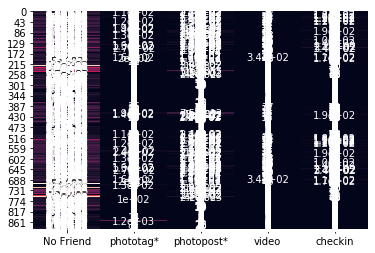

In [58]:
# 可以创建多个分组变量
import numpy as np
import pandas as pd
df4 = pd.read_csv('facebookac.csv').dropna()


# 下面三个都可以求解交叉表，优先使用crosstab()
pd.crosstab([df4['Status'],
             df4['gender'],
             df4['education']],
           df4['relationship'])

df4.groupby(['Status','gender',
             'education','relationship'])['relationship'].count().unstack().fillna(0)

pd.pivot_table(df4,index=['Status','gender',
                     'education'],
              columns=['relationship'],
                values='about me',
              aggfunc=len,
              fill_value=0)

#### Normalization

有的时候可能想得到的是频率交叉表，这时可以指定normalize=True

默认频率为频数除以总数的比值

如果只想针对列或行计算频率，需要指定normalize='columns'/'index'

In [52]:
pd.crosstab(df4['education'],df4['Status'],
                 normalize=True)

df5 = pd.crosstab(df4['education'],df4['Status'])
df5 / df5.sum().sum()

np.sum(np.asarray(df5))
# 统计行的频率
pd.crosstab(df4['education'],df4['Status'],
           normalize='index')

# 自己手动计算，很麻烦
total = pd.crosstab(df4['education'],df4['Status']).sum(axis=1)
pd.crosstab(df4['education'],df4['Status'])/np.asarray(total).reshape(4,1)


# 同样可以增加 margin,只有normalize=True时才会再列和行都有边缘

# 如果normalize='columns'/'index',只能手动添加margin
tt = pd.crosstab(df4['education'],df4['Status'],
           normalize='index',
           ).round(2)

tt.assign(total=tt['fake']+tt['real'])

Status,fake,real
education,,
high school,0.058559,0.054054
no,0.337838,0.102477
secondary school,0.009009,0.000000
university,0.083333,0.354730


Status,fake,real
education,,
high school,0.058559,0.054054
no,0.337838,0.102477
secondary school,0.009009,0.000000
university,0.083333,0.354730


888

Status,fake,real
education,,
high school,0.520000,0.480000
no,0.767263,0.232737
secondary school,1.000000,0.000000
university,0.190231,0.809769


Status,fake,real
education,,
high school,0.520000,0.480000
no,0.767263,0.232737
secondary school,1.000000,0.000000
university,0.190231,0.809769


Status,fake,real,total
education,,,
high school,0.52,0.48,1.0
no,0.77,0.23,1.0
secondary school,1.00,0.00,1.0
university,0.19,0.81,1.0


### 分类变量、哑变量

有时候进行数据分析的时候需要将分类变量转换为哑变量

pd.get_dummies()

In [68]:
df = pd.DataFrame({'key': list('bbacab'), 
                   'data1': range(6)})

pd.get_dummies(df['key'])

# prefix参数设置哑变量名前缀，便于交流
df
pd.get_dummies(df['key'],
              prefix='key').join(df[['data1']])



,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


,key_a,key_b,key_c,data1
0,0,1,0,0
1,0,1,0,1
2,1,0,0,2
3,0,0,1,3
4,1,0,0,4
5,0,1,0,5


## 读入文件

In [24]:
import pandas as pd 

# 读入csv文件
tb = pd.read_csv("zoo.csv",delimiter = ',')
tb

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


In [5]:
# 若原文件无列名，name参数指定列名

tb = pd.read_csv("pandas_tutorial_read.csv",
                 delimiter=";",
                names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])

tb

,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
...,...,...,...,...,...,...
1790,2018-01-01 23:57:14,read,country_2,2458153051,AdWords,North America
1791,2018-01-01 23:58:33,read,country_8,2458153052,SEO,Asia
1792,2018-01-01 23:59:36,read,country_6,2458153053,Reddit,Asia
1793,2018-01-01 23:59:36,read,country_7,2458153054,AdWords,Europe


## DataFrame中操作数据

其实大部分操作和　R tidyverse　中的操作思想大体类似

### 查看数据

In [8]:
# head()查看前几条数据
tb.head()

# tail()查看后几条数据
tb.tail()

# 随机查看5条数据
tb.sample(5)

,my_datetime,event,country,user_id,source,topic
655,2018-01-01 08:56:32,read,country_6,2458151916,Reddit,Australia
848,2018-01-01 11:28:31,read,country_2,2458152109,Reddit,Asia
684,2018-01-01 09:22:47,read,country_7,2458151945,AdWords,Australia
1755,2018-01-01 23:30:32,read,country_5,2458153016,AdWords,Europe
1117,2018-01-01 14:55:50,read,country_2,2458152378,Reddit,Europe


### 选择某些列

类似于Numpy中选择数组中的元素,用'[]'创建列表包含选择的列名

In [37]:
tb[['user_id','source']].head()

# 当你只是获取某一列(Series对象)，而不是获取多列
tb.user_id 
tb['user_id'] #等价
#上面返回的是一个series对象
tb[['user_id']] # DataFrame对象

0       2458151261
1       2458151262
2       2458151263
3       2458151264
4       2458151265
           ...    
1790    2458153051
1791    2458153052
1792    2458153053
1793    2458153054
1794    2458153055
Name: user_id, Length: 1795, dtype: int64

### 基于特定的属性的数据(行)

In [16]:
tb[tb.source == 'SEO'].head()

,my_datetime,event,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
11,2018-01-01 00:08:57,read,country_7,2458151272,SEO,Australia
15,2018-01-01 00:11:22,read,country_7,2458151276,SEO,North America
16,2018-01-01 00:13:05,read,country_8,2458151277,SEO,North America


### 链式操作

和R tidyverse中 %>% 操作符相比有点逊色，不过思想一样

In [17]:
pd.read_csv("pandas_tutorial_read.csv",
           delimiter=';',
           names=['my_datetime', 
                  'event', 
                  'country', 
                  'user_id', 
                  'source', 
                  'topic'])[['country','user_id']].head()

,country,user_id
0,country_7,2458151261
1,country_7,2458151262
2,country_7,2458151263
3,country_7,2458151264
4,country_8,2458151265


## Pandas数据整合

统计类函数如sum,max,min,median,count等都有axis参数，用于计算的维度,将DataFrame对象视为数组(Numpy)可以在某一个维度计算

In [62]:
zoo = pd.read_csv('zoo.csv', delimiter = ',')

### count()

计算每一列数据的总数

In [28]:
# 计算所有列
zoo.count()

# 计算部分列
zoo[['uniq_id']].count()
zoo.uniq_id.count()

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
dtype: int64

### sum()

In [29]:
# 默认计算所有列,(若有字符串，则将所有字符串拼接)
zoo.sum()

# 计算部分列
zoo.water_need.sum()

7650

### mean()

In [30]:
zoo.water_need.mean()

347.72727272727275

### median()

In [31]:
zoo.water_need.median()

325.0

### grouping

类似于SQL中的group by,进行分组计算

In [38]:
zoo.groupby('animal').mean()[['water_need']]

,water_need
animal,
elephant,550.000000
kangaroo,416.666667
lion,477.500000
tiger,310.000000
zebra,184.285714


## Merge,Join,Concat

### Merge

类似于SQL中的多表连接(左外连接，右外连接，自连，内连，全外连接)

merge()函数默认内连接,通过how参数指定其他连接方式

#### 内连接

In [65]:
zoo_eats = pd.read_csv('zoo_eats',delimiter=';')

zoo
zoo_eats
zoo.merge(zoo_eats)

zoo_eats.merge(zoo)

# 结果一样只是列的顺序不同

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


,animal,food
0,elephant,vegetables
1,tiger,meat
2,kangaroo,vegetables
3,zebra,vegetables
4,giraffe,vegetables


,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


,animal,food,uniq_id,water_need
0,elephant,vegetables,1001,500
1,elephant,vegetables,1002,600
2,elephant,vegetables,1003,550
3,tiger,meat,1004,300
4,tiger,meat,1005,320
5,tiger,meat,1006,330
6,tiger,meat,1007,290
7,tiger,meat,1008,310
8,kangaroo,vegetables,1020,410
9,kangaroo,vegetables,1021,430


#### 全外连接

In [44]:
zoo.merge(zoo_eats,how="outer")

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


#### 左外连接

In [ ]:
# 左外连接(merge左边为被查询表)
zoo.merge(zoo_eats,how="left")

#### 右外连接

In [47]:
# 右外连接(右表为被查询表)
zoo_eats.merge(zoo,how="right")

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


#### 指定连接条件

在SQL中，ON关键字指定连接条件，有等值连接和非等值连接

Pandas中如果不指定连接条件，则以相同列名作为连接条件进行连接

若没有相同列名，则需要分别指定left_on,right_on参数

In [ ]:
# 对上面进行复写，效果一样
zoo.merge(zoo_eats, 
          how = 'left', 
          left_on = 'animal', 
          right_on = 'animal')

#### Merge on Index

设定right_index/left_index用于设定右表/左表的Index作为连接条件

In [ ]:
df_left = DataFrame({'key': ['X','Y','Z','X','Y'],
                  'data': range(5)})
df_right = DataFrame({'group_data': [10, 20]}, index=['X', 'Y'])

df_left
df_right

pd.merge(df_left,
         df_right,
         left_on='key',
         right_index=True # 使用右表的INdex
        )

#### 检查是否存在重复key 

使用validate参数自动检查连接条件是否存在重复key,防止内存溢出

In [11]:
import pandas as pd
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})
right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})

try:
    pd.merge(left,right,on='B',how='outer',validate='1:1')
except:
    pass


pd.merge(left,right,on='B',how='outer',validate='1:m')

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,3,2,4.0


#### indicator

使用indicator指示，如果为True,将在结果生成一个列名为_merge的列

_merge列有三种值:

left_only 连接条件在left表中
right_only 连接条件在right表中
both 连接条件在两个表中都有

In [17]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left': ['a', 'b']})

df2 = pd.DataFrame({'col1': [1, 2, 2], 'col_right': [2, 2, 2]})

df3 = pd.merge(df1, df2, on='col1', how='outer', indicator=True)

df3.loc[df3._merge.str.startswith('left'),:]

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only


### concat

In [69]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

        
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                   'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                     index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### keys参数

默认为None,我们想建立索引来区分合并前的表的结构，传入list,长度于连接的表的数量相同

In [78]:
r = pd.concat([df1,df2,df3],keys=['x','y','z'])
r
# 很容易获取原始表
r.xs('x',level=0)

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


concat()将原始数据会做一个拷贝，如果处理多个表，建议使用列表生成式

In [ ]:
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)

#### Set logic on the other axes

当合并过程中，如何处理不同的列时需要好好考虑，有两种方式处理:

join='outer' 这个默认设置，显示所有列

join='inner' 只合并交集列

In [87]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                   'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

pd.concat([df1,df4],axis=1,keys=['x','y'],sort=False)


pd.concat([df1,df4],axis=1,keys=['x','y'],sort=False,
         join='inner')

df1.append(df4)

x                   y          
     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

x               y        
    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### append

append()是concat()的shortcut,直接作用于Series和DataFrame

append()实际上是拼接行

In [86]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


#### Ignoring indexes

默认合并后不用忽略原本的索引，设置ignore_index=True 重新定制索引

In [89]:
df1.append(df4, ignore_index=True, sort=False)

pd.concat([df1,df4],axis=0,keys=['x','y'],sort=False,
         ignore_index=True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


#### DataFrame和Series合并

你可以合并Series和DataFrame,Series.name将作为合并的的列名

也可以通过assign()实现Series和DataFrame的合并，不过assign()更多的是完成R中的mutate()类似的工作

In [91]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
pd.concat([df1, s1], axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,NaN


#### 组合索引

使用keys参数是一个常见的用法，用于创建多重索引，当非合并索引存在重复时，为了避免混淆，使用keys指定父索引

**为了便于分析数据，concat支持字典传参，使用字典的key,指定父索引**

In [95]:
s3 = pd.Series([0, 1, 2, 3], name='foo')
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3,s4,s5],axis=1,
         keys=['A','B','C'])


# concat支持字典传参，指定父索引

pd.concat({'A':s3,
          'B':s4,
          'C':s5},
        axis=1)

,A,B,C
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


,A,B,C
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


### Join on index

DataFrame.join()非常方便用Index为连接条件合并两个dataframe为一个dataframe

默认join()使用左连接(Excel中的VLookup)

In [21]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

left.join(right)

#　使用merge也可以实现
pd.merge(left,right,left_index=True,right_index=True,
        how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


同样具有how参数指定合并方式

In [19]:
left.join(right, how='outer')

left.join(right, how='inner')



,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


join()有一个可选的参数on,用来指定一个或多个列名，用列作为和另一个dataframe的INdex作为连接条件

In [22]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})

right = pd.DataFrame({'C': ['C0', 'C1'],
                     'D': ['D0', 'D1']},
                     index=['K0', 'K1'])

left.join(right,on='key')

# merge也可以实现,很显然使用join()更方便

pd.merge(left,right,right_index=True,
        left_on='key',
        how='left')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


#### 单索引和复合索引连接 

In [28]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=pd.Index(['K0', 'K1', 'K2'], name='key'))

index = pd.MultiIndex.from_tuples([('K0', 'Y0'), ('K1', 'Y1'),
                                   ('K2', 'Y2'), ('K2', 'Y3')],
                                  names=['key', 'Y'])

right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']},
                     index=index)
left
right
left.join(right)

# merge()也可以同样实现
right.reset_index()
pd.merge(left.reset_index(),
        right.reset_index(),
         on=['key'],
         how='inner'
        ).set_index(['key','Y'])

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

,key,Y,C,D
0,K0,Y0,C0,D0
1,K1,Y1,C1,D1
2,K2,Y2,C2,D2
3,K2,Y3,C3,D3


A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

#### 连接两个复合索引

使用join()基于复合索引连接有一个前提，即left表的复合索引是right表复合索引的子集,只有满足这个条件才可以用join()，否则只能使用merge()

left.join(right)

In [30]:
leftindex = pd.MultiIndex.from_product([list('abc'), list('xy'), [1, 2]],
                                       names=['abc','xy','num'])

left = pd.DataFrame({'v1': range(12)}, index=leftindex)

left

rightindex = pd.MultiIndex.from_product([list('abc'), list('xy')],
                                        names=['abc', 'xy'])

right = pd.DataFrame({'v2': [100 * i for i in range(1, 7)]}, index=rightindex)
right
                     
left.join(right, on=['abc', 'xy'], how='inner')
                     
# merge
                     
pd.merge(left.reset_index(),
        right.reset_index(),
        on=['abc','xy'],
        how='inner').set_index(['abc','xy','num'])

v1
abc xy num    
a   x  1     0
       2     1
    y  1     2
       2     3
b   x  1     4
       2     5
    y  1     6
       2     7
c   x  1     8
       2     9
    y  1    10
       2    11

v2
abc xy     
a   x   100
    y   200
b   x   300
    y   400
c   x   500
    y   600

v1   v2
abc xy num         
a   x  1     0  100
       2     1  100
    y  1     2  200
       2     3  200
b   x  1     4  300
       2     5  300
    y  1     6  400
       2     7  400
c   x  1     8  500
       2     9  500
    y  1    10  600
       2    11  600

v1   v2
abc xy num         
a   x  1     0  100
       2     1  100
    y  1     2  200
       2     3  200
b   x  1     4  300
       2     5  300
    y  1     6  400
       2     7  400
c   x  1     8  500
       2     9  500
    y  1    10  600
       2    11  600

前面看到也可以使用merge()完成列与索引作为连接条件进行合并，不过在pandas 0.23版之后，on,left_on,right_on参数可以传入列名或索引名，因此就不需要进行reset_index操作

不过需要注意的是，复合索引中为参与连接的level,将被舍弃，因此如果不想丢弃，还是需要使用reset_index

In [34]:
pd.merge(left,
        right,
        on=['abc','xy'],
        how='inner')

# 上面'num' level被舍弃
pd.merge(left.reset_index(),
        right.reset_index(),
        on=['abc','xy'],
         how='inner').set_index(['abc','xy','num'])

v1   v2
abc xy         
a   x    0  100
    x    1  100
    y    2  200
    y    3  200
b   x    4  300
    x    5  300
    y    6  400
    y    7  400
c   x    8  500
    x    9  500
    y   10  600
    y   11  600

v1   v2
abc xy num         
a   x  1     0  100
       2     1  100
    y  1     2  200
       2     3  200
b   x  1     4  300
       2     5  300
    y  1     6  400
       2     7  400
c   x  1     8  500
       2     9  500
    y  1    10  600
       2    11  600

### Overlapping value columns

merge()的参数suffixes参数定义后缀，用来区分两个表含有相同名称的列名,默认使用　'\_x'　和　'\_y'　区分

In [44]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'v': [1, 2, 3]})
right = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'v': [4, 5, 6]})
left
right
pd.merge(left,right,on='k')

# 自定义后缀
pd.merge(left,right,on='k',suffixes=['_A','_B'])


,k,v
0,K0,1
1,K1,2
2,K2,3


,k,v
0,K0,4
1,K0,5
2,K3,6


,k,v_x,v_y
0,K0,1,4
1,K0,1,5


,k,v_A,v_B
0,K0,1,4
1,K0,1,5


,k,v
0,K0,1
1,K1,2
2,K2,3


,k,v
0,K0,4
1,K0,5
2,K3,6


### Join multiple DataFrames

join()可以传入一个由dataframe组成的list或者tuple,基于index一次合并多个dataframe

In [45]:
left = left.set_index('k')
right = right.set_index('k')

right2 = pd.DataFrame({'v': [7, 8, 9]}, index=['K1', 'K1', 'K2'])
right2
left.join([right, right2])

,v
K1,7
K1,8
K2,9


,v_x,v_y,v
K0,1,4.0,NaN
K0,1,5.0,NaN
K1,2,NaN,7.0
K1,2,NaN,8.0
K2,3,NaN,9.0


### Merging together values within Series or DataFrame columns

另一个十分常见的应用是基于两个表对表进行修补，合并重叠项,通常用于缺失值的填补，若两个表中某个值都存在，那么该值不会被替换

In [48]:
import numpy as np
df1 = pd.DataFrame([[np.nan, 3., 5.], [-4.6, np.nan, np.nan],
                    [np.nan, 7., np.nan]])

df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5., 1.6, 4]],
                   index=[1, 2])

df1
df2

df1.combine_first(df2)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN


,0,1,2
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


另一个相关的函数是update()，不同的是如果两个表都存在的值会被第二表中的值更新

In [51]:
df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


## Sorting

Pandas库提供sort_values()函数进行排序,默认升序
使用 by 参数指定排序使用的字段
ascending指定升序或降序

In [50]:
zoo.sort_values(by='water_need')

# 按一个字段排序可以省略by
zoo.sort_values('water_need')

,animal,uniq_id,water_need
0,elephant,1001,500
2,elephant,1003,550
1,elephant,1002,600
19,kangaroo,1020,410
21,kangaroo,1022,410
20,kangaroo,1021,430
18,lion,1019,390
15,lion,1016,420
17,lion,1018,500
16,lion,1017,600


In [51]:
# 降序
zoo.sort_values('water_need',ascending=False)

,animal,uniq_id,water_need
1,elephant,1002,600
16,lion,1017,600
2,elephant,1003,550
0,elephant,1001,500
17,lion,1018,500
20,kangaroo,1021,430
15,lion,1016,420
19,kangaroo,1020,410
21,kangaroo,1022,410
18,lion,1019,390


In [55]:
# 按多个字段,传入一个列表
zoo.sort_values(by=['animal','water_need'])

# ascending也可以指定一个列表，进行先降序后升序
zoo.sort_values(by=['animal','water_need'] ,
               ascending=[False,True])

RangeIndex(start=0, stop=22, step=1)

前面排序发现，排序完之后DataFrame 行的索引顺序被打乱了
这不利于后期绘图以及机器学习

因此，在Pandas中在排序完之后可以使用reset_index()函数重新设置Index

In [57]:
# 默认情况下，保留原先的Index
zoo.sort_values('water_need').reset_index()

# 使用drop=True舍弃原先的Index
zoo.sort_values('water_need').reset_index(drop=True)

,animal,uniq_id,water_need
0,zebra,1015,80
1,zebra,1014,100
2,zebra,1009,200
3,zebra,1010,220
4,zebra,1013,220
5,zebra,1012,230
6,zebra,1011,240
7,tiger,1007,290
8,tiger,1004,300
9,tiger,1008,310


## Fillna

在前面多表连接时存在一些缺失值，在数据分析时，我们一般会对缺失值进行替换，替换为0或者某个字符串

Pandas提供了 fillna()函数

In [66]:
# 以'unknown'进行填补
zoo.merge(zoo_eats,how='left').fillna('unknown')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


不指定具体的替换内容
可以提供 method参数用原始数据填补,pad、backfill

In [ ]:
# pad表示用上一个有效的数据进行填补
zoo.merge(zoo_eats,how='left').fillna(method="pad")

# backfill表示用下一个有效的数据进行填补
zoo.merge(zoo_eats,how='left').fillna(method='backfill')

在 fillna()中默认不会原位修改数据

使用 inplace=True可以进行原位修改，这时DataFrame的所有视图将会修改

In [69]:
mer = zoo.merge(zoo_eats,how='left')

# 创建视图
mer1 = mer

# 原位填充
mer.fillna(method='pad',inplace=True)

# 视图mer1也会被修改
print(mer1)

      animal  uniq_id  water_need        food
0   elephant     1001         500  vegetables
1   elephant     1002         600  vegetables
2   elephant     1003         550  vegetables
3      tiger     1004         300        meat
4      tiger     1005         320        meat
5      tiger     1006         330        meat
6      tiger     1007         290        meat
7      tiger     1008         310        meat
8      zebra     1009         200  vegetables
9      zebra     1010         220  vegetables
10     zebra     1011         240  vegetables
11     zebra     1012         230  vegetables
12     zebra     1013         220  vegetables
13     zebra     1014         100  vegetables
14     zebra     1015          80  vegetables
15      lion     1016         420  vegetables
16      lion     1017         600  vegetables
17      lion     1018         500  vegetables
18      lion     1019         390  vegetables
19  kangaroo     1020         410  vegetables
20  kangaroo     1021         430 

## MultiIndex

在如今的高维数据中，存在多级索引，多重索引的每一个子索引称为level

### 创建多级索引对象

多级索引中每一个数组中的每一个元组都是特殊的，可以使用数组、元组等构建多级索引

name参数设定每一个INDEX的标签

In [73]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

tuples = list(zip(*arrays))

tuples

index = pd.MultiIndex.from_tuples(tuples,names=['first',
                                               'second'])
s = pd.Series(np.random.randn(8), index=index)

s

first  second
bar    one       1.233379
       two       0.937671
baz    one      -1.865985
       two       0.059112
foo    one      -2.359720
       two       1.031688
qux    one       0.378976
       two       0.142595
dtype: float64

上面是基于tuple构建，实际上很麻烦，推荐使用from_product()

直接输入嵌套列表，列表中的每个元素也是一个list,每个list中的元素是该索引的水平

In [77]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]

index = pd.MultiIndex.from_product(iterables, names=['first', 'second'])

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

在创建Series/DataFrame时，你也可以直接使用一个数组列表作为index的参数值这样可以直接创建多级索引

In [150]:
arrays = [np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']),
          np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])]

s = pd.Series(np.random.randn(8), index=arrays)

print(s)

df = pd.DataFrame(np.random.randn(8, 4), index=arrays,columns=['A','B','C','D'])
print(df)

# 使用index.set_names()为多重索引命名
df.index.set_names(['first','second'],inplace=True)
df

bar  one   -3.597741
     two   -0.252465
baz  one    0.580916
     two   -0.560830
foo  one   -0.329874
     two   -1.222578
qux  one   -0.354658
     two   -1.021584
dtype: float64
                A         B         C         D
bar one -0.369746 -0.724582  0.329722 -1.399232
    two  1.296620  0.652922 -0.764377  0.192364
baz one  0.362950  0.064105 -0.565983 -0.641962
    two -0.069299  0.859082 -2.521357 -1.501270
foo one -0.614784  1.972513 -1.002980  0.072211
    two -1.338952  1.508801  0.427803  1.080101
qux one -0.483697  0.355364  1.603172 -0.726588
    two -0.756985  0.073188  1.932438 -0.557275


A         B         C         D
first second                                        
bar   one    -0.369746 -0.724582  0.329722 -1.399232
      two     1.296620  0.652922 -0.764377  0.192364
baz   one     0.362950  0.064105 -0.565983 -0.641962
      two    -0.069299  0.859082 -2.521357 -1.501270
foo   one    -0.614784  1.972513 -1.002980  0.072211
      two    -1.338952  1.508801  0.427803  1.080101
qux   one    -0.483697  0.355364  1.603172 -0.726588
      two    -0.756985  0.073188  1.932438 -0.557275

### 获取多级索引

对于Index对象可以使用get_level_values()返回多重索引的某个索引

In [78]:
index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

### 多重索引中基础Indexing

多级索引获取数据时要逐层索引

In [91]:
# 获取第一层索引
print(df.loc['bar'])

# 获取第二层索引
print(df.loc[('bar','one'),])

print(df.loc['bar'].loc['one']) # 和上面等价

            A         B         C         D
one  0.022276 -0.868842  1.040664  0.947150
two -0.103608  0.439385  2.419487 -0.834779
A    0.022276
B   -0.868842
C    1.040664
D    0.947150
Name: (bar, one), dtype: float64
A    0.022276
B   -0.868842
C    1.040664
D    0.947150
Name: one, dtype: float64


#### reindex

多重索引结构中也可以使用reindex

In [90]:
s.reindex(index[:3])

first  second
bar    one       0.037117
       two      -0.825307
baz    one       1.200151
dtype: float64

### 多重索引中高级Indexing

#### 普通方法

In [119]:
df.loc[:,['A','B']]

df.iloc[:,:-1]

# 注意括号的使用
df.loc[('baz', 'two'):('qux', 'one')]

# .loc指定axis参数表示仅对当前轴切片，这样非常方便

df.loc(axis=0)[:,'one']

,,A,B,C,D
bar,one,0.022276,-0.868842,1.040664,0.947150
baz,one,-0.019357,0.425881,-0.787746,-0.684038
foo,one,-0.440293,0.562453,-0.676060,-1.494435
qux,one,-0.540817,0.866047,-1.364739,0.211503


#### loc with slice

In [98]:
# loc可以结合slice,slice中定义一个起始索引和终止索引，None表示选取所有

df.loc[(slice('bar','qux'),slice(None)),:]

A         B         C         D
bar one  0.022276 -0.868842  1.040664  0.947150
    two -0.103608  0.439385  2.419487 -0.834779
baz one -0.019357  0.425881 -0.787746 -0.684038
    two -0.547204 -2.488884  0.153439  1.707615
foo one -0.440293  0.562453 -0.676060 -1.494435
    two -0.217799 -0.919811 -0.420380 -1.042204
qux one -0.540817  0.866047 -1.364739  0.211503
    two -0.144241  0.846520  0.202532 -0.168395

#### 使用布尔索引

In [107]:
# 选择('bar','two')索引<0的列

mask = df.loc[('bar','two')]<0

df.loc[:,mask]

A         D
bar one  0.022276  0.947150
    two -0.103608 -0.834779
baz one -0.019357 -0.684038
    two -0.547204  1.707615
foo one -0.440293 -1.494435
    two -0.217799 -1.042204
qux one -0.540817  0.211503
    two -0.144241 -0.168395

#### Cross-section

.xs()方法使得从多重索引DataFrame中选择部分索引更方便

In [ ]:
print(df.xs('bar'))

# 第一个参数可为元组表示一个索引递进关系
df.xs(('bar','one'),level=[0,1])

# 以下三种方法等价，可以看出.xs()的方便之处 
print(df.xs('one',level=1))

print(df.loc(axis=0)[:,'one'])

print(df.loc[(slice(None),'one'),:])

#### swaplevel

swaplevel()可以交换多重索引的level的顺序

In [142]:
df.swaplevel(0,1,axis=0)

,,A,B,C,D
one,bar,0.022276,-0.868842,1.040664,0.947150
two,bar,-0.103608,0.439385,2.419487,-0.834779
one,baz,-0.019357,0.425881,-0.787746,-0.684038
two,baz,-0.547204,-2.488884,0.153439,1.707615
one,foo,-0.440293,0.562453,-0.676060,-1.494435
two,foo,-0.217799,-0.919811,-0.420380,-1.042204
one,qux,-0.540817,0.866047,-1.364739,0.211503
two,qux,-0.144241,0.846520,0.202532,-0.168395


#### reorder_levels

In [145]:
df1 = df.reorder_levels([1,0],axis=0)

### 多重索引排序

在多重索引中使用sort_index()可以排序，指定多重索引的level即可

In [152]:
df1.sort_index(level=0)

df1.sort_index(level=1)

,,A,B,C,D
one,bar,0.022276,-0.868842,1.040664,0.947150
two,bar,-0.103608,0.439385,2.419487,-0.834779
one,baz,-0.019357,0.425881,-0.787746,-0.684038
two,baz,-0.547204,-2.488884,0.153439,1.707615
one,foo,-0.440293,0.562453,-0.676060,-1.494435
two,foo,-0.217799,-0.919811,-0.420380,-1.042204
one,qux,-0.540817,0.866047,-1.364739,0.211503
two,qux,-0.144241,0.846520,0.202532,-0.168395


### set_index 和 reset_index

DataFrame可以通过set_index方法，可以设置单索引和复合索引

DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False) 

drop 表示是否将该列删除
append 表示是否对原索引覆盖

reset_index可以还原索引，重新变为默认的整型索引 
DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill=”) 

level控制了具体要还原的那个等级的索引 
drop为False则索引列会被还原为普通列，否则会丢失

In [10]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a':['bar','bar','foo','foo'],
    'b':['one','two','one','two'],
    'c':['x','y','x','w'],
    'd':[1,2,3,4]
})

# append=True,表示不对之前的索引覆盖，默认为False
df.set_index('c',append=True)

# 可以将多个列转为索引
df.set_index(['a','c'])

# drop=False，表示该列仍保留
df1 = df.set_index(['a','c'])

In [13]:
# reset_index进行还原,默认将索引的所有level还原
df1.reset_index()

# 指定将特定 level还原
df1.reset_index(level=1)

,c,b,d
a,,,
bar,x,one,1
bar,y,two,2
foo,x,one,3
foo,w,two,4


## 分类数据

分类数据类型相当于R中的factor

分类数据具有有限数量的值 categories (在R中称为levels)

分类数据在以下情况非常有用:

- 当字符变量仅有几个不同的元素值，将其转换为分类变量将节省空间

- 变量的词汇顺序和逻辑顺序不同时，通过转换为分类变量并指定一个顺序，使用逻辑顺序排序

- 在使用一些统计方法或者画图时，将某列变量转换为分类变量

### 创建对象

创建分类Series或DataFrame中的分类变量有许多方法

#### 分类Series

##### 创建Series时指定dtype

构建Series时设定dtype='category'

In [52]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

##### astype()转换普通Series为分类Series

as.type('category')将已存在的Series进行转换

In [54]:
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})

df['B'] = df['A'].astype('category')
df['B']

0    a
1    b
2    c
3    a
Name: B, dtype: category
Categories (3, object): [a, b, c]

##### cut()

数据离散化,也被成为分箱处理

In [57]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})

labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]

df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)

df.head(5)

,value,group
0,61,60 - 69
1,88,80 - 89
2,99,90 - 99
3,32,30 - 39
4,54,50 - 59
